In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff

In [2]:
df= pd.read_csv("Star.csv")
df.drop(columns=['rownames'])
df.head()

,rownames,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn
0,2,473,447,small.class,7,girl,no,white,63
1,3,536,450,small.class,21,girl,no,black,20
2,5,463,439,regular.with.aide,0,boy,yes,black,19
3,11,559,448,regular,16,boy,no,white,69
4,12,489,447,small.class,5,boy,yes,white,79


In [3]:
rename = { "tmathssk" : "scaled_math_score",
"treadssk": "scaled_reading_score",
"classk": "class_type",
"totexpk": "total_teaching_experience",
"freelunk": "qualified_for_free_lunch",
"schidkn": "school_id",}

In [4]:
df.columns

Index(['rownames', 'tmathssk', 'treadssk', 'classk', 'totexpk', 'sex',
       'freelunk', 'race', 'schidkn'],
      dtype='object')

In [5]:
df.rename(columns = rename, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   rownames                   5748 non-null   int64 
 1   scaled_math_score          5748 non-null   int64 
 2   scaled_reading_score       5748 non-null   int64 
 3   class_type                 5748 non-null   object
 4   total_teaching_experience  5748 non-null   int64 
 5   sex                        5748 non-null   object
 6   qualified_for_free_lunch   5748 non-null   object
 7   race                       5748 non-null   object
 8   school_id                  5748 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 404.3+ KB


In [7]:
df.describe()

,rownames,scaled_math_score,scaled_reading_score,total_teaching_experience,school_id
count,5748.000000,5748.000000,5748.000000,5748.000000,5748.000000
mean,5752.660404,485.648051,436.742345,9.307411,39.836639
std,3329.971901,47.771531,31.772857,5.767700,22.957552
min,2.000000,320.000000,315.000000,0.000000,1.000000
25%,2884.750000,454.000000,414.000000,5.000000,20.000000
50%,5733.500000,484.000000,433.000000,9.000000,39.000000
75%,8624.250000,513.000000,453.000000,13.000000,60.000000
max,11598.000000,626.000000,627.000000,27.000000,80.000000


In [8]:
px.histogram(df, x = 'scaled_math_score', facet_col='sex', )

In [9]:
px.histogram(df, x = 'scaled_math_score', facet_col='race')

In [10]:
df.select_dtypes(include=['object'])

,class_type,sex,qualified_for_free_lunch,race
0,small.class,girl,no,white
1,small.class,girl,no,black
2,regular.with.aide,boy,yes,black
3,regular,boy,no,white
4,small.class,boy,yes,white
...,...,...,...,...
5743,small.class,boy,no,white
5744,small.class,boy,no,white
5745,regular,girl,yes,white
5746,regular,girl,yes,black


In [11]:
sexes = df.groupby(['sex'])

In [12]:
sexes.describe()[['scaled_math_score', 'scaled_reading_score']].T

sex                                 boy         girl
scaled_math_score    count  2954.000000  2794.000000
                     mean    481.883209   489.628490
                     std      47.618214    47.618886
                     min     320.000000   320.000000
                     25%     449.000000   459.000000
                     50%     478.000000   484.000000
                     75%     513.000000   520.000000
                     max     626.000000   626.000000
scaled_reading_score count  2954.000000  2794.000000
                     mean    433.781991   439.872226
                     std      30.799427    32.483940
                     min     315.000000   346.000000
                     25%     413.000000   418.000000
                     50%     430.000000   436.000000
                     75%     450.000000   456.000000
                     max     627.000000   627.000000

In [13]:
races = df.groupby(['race'])

races.describe()[['scaled_math_score', 'scaled_reading_score']].T

race                              black       other        white
scaled_math_score    count  1852.000000   27.000000  3869.000000
                     mean    473.558855  480.259259   491.472474
                     std      48.593911   51.800351    46.244646
                     min     320.000000  384.000000   320.000000
                     25%     439.000000  446.500000   459.000000
                     50%     468.000000  468.000000   489.000000
                     75%     500.000000  513.000000   520.000000
                     max     626.000000  602.000000   626.000000
scaled_reading_score count  1852.000000   27.000000  3869.000000
                     mean    428.930886  440.962963   440.452055
                     std      28.784011   38.768030    32.407215
                     min     346.000000  384.000000   315.000000
                     25%     410.000000  413.500000   419.000000
                     50%     424.000000  436.000000   436.000000
                     75%     443.000000  456.500000   456.000000
                     max     627.000000  565.000000   627.000000

In [14]:
races[['class_type', 'sex']].value_counts(normalize=True)

race   class_type         sex 
black  regular.with.aide  boy     0.182505
                          girl    0.182505
       regular            boy     0.176566
                          girl    0.166847
       small.class        girl    0.152808
                          boy     0.138769
other  small.class        boy     0.259259
       regular            girl    0.222222
                          boy     0.148148
       regular.with.aide  girl    0.148148
                          boy     0.111111
       small.class        girl    0.111111
white  regular            boy     0.180150
       regular.with.aide  boy     0.179375
       regular            girl    0.169811
       regular.with.aide  girl    0.164900
       small.class        boy     0.162057
                          girl    0.143706
Name: proportion, dtype: float64

In [15]:
class_types = df.groupby(['class_type'])

class_types[['scaled_math_score', 'scaled_reading_score']].mean()

,scaled_math_score,scaled_reading_score
class_type,,
regular,483.261000,434.681000
regular.with.aide,483.009926,435.487345
small.class,491.470283,440.580496


In [16]:
px.line(class_types[['scaled_math_score', 'scaled_reading_score']].mean())

<Axes: xlabel='class_type', ylabel='scaled_math_score'>

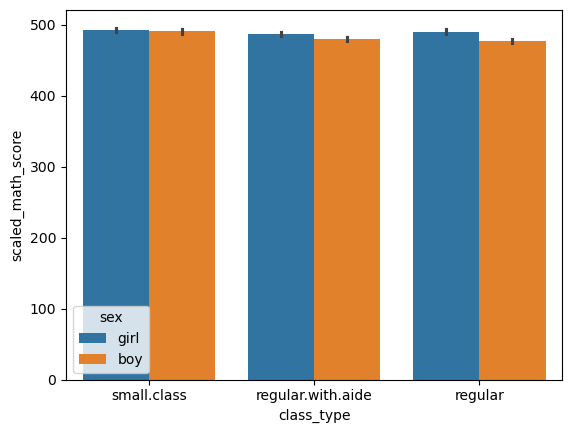

In [17]:
sns.barplot(df, x='class_type', y='scaled_math_score', hue='sex')

In [18]:
x = df.groupby(['class_type', 'sex'])

In [19]:
x.get_group(name=('regular', 'girl'))[['scaled_math_score']]

,scaled_math_score
7,500
17,528
26,559
29,423
32,434
...,...
5726,506
5729,559
5731,468
5745,513


In [20]:
mathscore_regular_girls = x.get_group(name=('regular', 'girl'))[['scaled_math_score']]

ssw_girls = np.sum((mathscore_regular_girls - mathscore_regular_girls.mean())**2)

ssw_girls, len(mathscore_regular_girls)

/home/ksingh/miniconda3/envs/dl/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



(scaled_math_score    2.237129e+06
 dtype: float64,
 972)

In [21]:
mathscore_regular_boys = x.get_group(name=('regular', 'boy'))[['scaled_math_score']]

ssw_boys = np.sum((mathscore_regular_boys - mathscore_regular_boys.mean())**2)

ssw_boys, len(mathscore_regular_boys)

/home/ksingh/miniconda3/envs/dl/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



(scaled_math_score    2.181928e+06
 dtype: float64,
 1028)

In [22]:
sst = np.sum((class_types.get_group(name='regular')[['scaled_math_score']] - class_types.get_group(name='regular')[['scaled_math_score']].mean())**2)
sst

/tmp/ipykernel_7487/582678081.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/tmp/ipykernel_7487/582678081.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/ksingh/miniconda3/envs/dl/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



scaled_math_score    4510369.758
dtype: float64

In [23]:
np.sum((class_types.get_group(name='regular')[['scaled_math_score']] - class_types.get_group(name='regular')[['scaled_math_score']].mean())**2)

/tmp/ipykernel_7487/2922235455.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/tmp/ipykernel_7487/2922235455.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/home/ksingh/miniconda3/envs/dl/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



scaled_math_score    4510369.758
dtype: float64

In [24]:
ssb = sst - (ssw_boys+ssw_girls)

ssb

scaled_math_score    91312.942465
dtype: float64

In [25]:
dof_between_treatments = 2-1
dof_within_treatments = 1998.0

msb = ssb/(dof_between_treatments)
msw = (ssw_boys+ssw_girls)/(dof_within_treatments)

In [26]:
f = msb/msw

f

scaled_math_score    41.285565
dtype: float64

In [27]:
class_types.get_group(name='regular')

/tmp/ipykernel_7487/3095502670.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



,rownames,scaled_math_score,scaled_reading_score,class_type,total_teaching_experience,sex,qualified_for_free_lunch,race,school_id
3,11,559,448,regular,16,boy,no,white,69
5,13,454,431,regular,8,boy,yes,white,5
7,21,500,451,regular,3,girl,no,white,56
10,28,473,430,regular,13,boy,no,white,38
15,35,484,439,regular,13,boy,no,white,54
...,...,...,...,...,...,...,...,...,...
5727,11549,547,434,regular,20,boy,yes,black,23
5729,11560,559,490,regular,13,girl,no,white,79
5731,11562,468,442,regular,13,girl,no,white,75
5745,11595,513,437,regular,0,girl,yes,white,67


/tmp/ipykernel_7487/2704533234.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



<Axes: title={'center': 'scaled_math_score'}, xlabel='sex'>

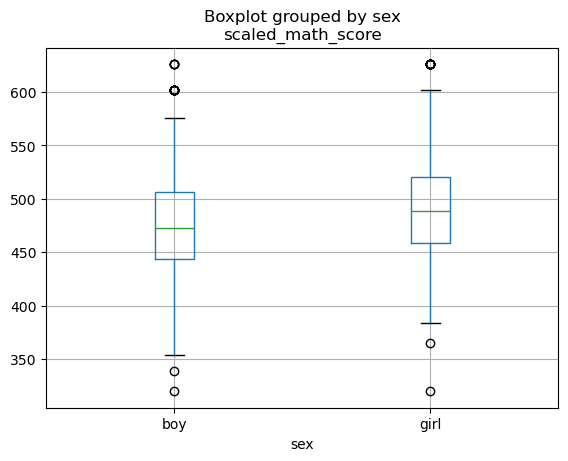

In [28]:
class_types.get_group(name='regular').boxplot('scaled_math_score', by='sex')

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [30]:
spc_format = ols('scaled_math_score ~ sex', data=class_types.get_group(name='regular')[['scaled_math_score', 'sex']]).fit()

sm.stats.anova_lm(spc_format)

/tmp/ipykernel_7487/1582685953.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,9.131294e+04,91312.942465,41.285565,1.639874e-10
Residual,1998.0,4.419057e+06,2211.740148,NaN,NaN


# Oneway ANOVA for effects on sex on scaled_maths_score for small classes

In [31]:
data = class_types.get_group('small.class')

data

/tmp/ipykernel_7487/2088658940.py:1: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



,rownames,scaled_math_score,scaled_reading_score,class_type,total_teaching_experience,sex,qualified_for_free_lunch,race,school_id
0,2,473,447,small.class,7,girl,no,white,63
1,3,536,450,small.class,21,girl,no,black,20
4,12,489,447,small.class,5,boy,yes,white,79
8,23,439,478,small.class,11,girl,no,black,11
9,25,528,455,small.class,10,girl,no,white,66
...,...,...,...,...,...,...,...,...,...
5740,11585,399,390,small.class,3,boy,yes,black,45
5741,11586,528,605,small.class,1,girl,no,white,73
5742,11591,484,448,small.class,8,boy,no,white,58
5743,11593,468,422,small.class,6,boy,no,white,62


In [32]:
spc_format = ols('scaled_math_score ~ sex', data=data[['scaled_math_score', 'sex']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,2.236754e+03,2236.754498,0.913977,0.339195
Residual,1731.0,4.236235e+06,2447.276121,NaN,NaN


In [33]:
sst = np.sum((data['scaled_math_score'] - data['scaled_math_score'].mean())**2)
sst

4238471.719561454

In [34]:
ssw = np.sum((data[data['sex'] == 'boy']['scaled_math_score'] - data[data['sex'] == 'boy']['scaled_math_score'].mean())**2) + np.sum((data[data['sex'] == 'girl']['scaled_math_score'] - data[data['sex'] == 'girl']['scaled_math_score'].mean())**2)

ssw

4236234.965063674

In [35]:
ssb = sst-ssw

In [36]:
msb = ssb/(2-1)
msw = ssw/(data.shape[0]-1)


f = msb/msw
f

0.9145051731321804

# Oneway ANOVA to gauage to effect of race on scaled maths score

In [37]:
data

,rownames,scaled_math_score,scaled_reading_score,class_type,total_teaching_experience,sex,qualified_for_free_lunch,race,school_id
0,2,473,447,small.class,7,girl,no,white,63
1,3,536,450,small.class,21,girl,no,black,20
4,12,489,447,small.class,5,boy,yes,white,79
8,23,439,478,small.class,11,girl,no,black,11
9,25,528,455,small.class,10,girl,no,white,66
...,...,...,...,...,...,...,...,...,...
5740,11585,399,390,small.class,3,boy,yes,black,45
5741,11586,528,605,small.class,1,girl,no,white,73
5742,11591,484,448,small.class,8,boy,no,white,58
5743,11593,468,422,small.class,6,boy,no,white,62


In [38]:
data = df[['scaled_math_score', 'race']]

spc_format = ols('scaled_math_score ~ race', data=data[['scaled_math_score', 'race']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
race,2.0,4.027029e+05,201351.459895,90.993255,1.244889e-39
Residual,5745.0,1.271264e+07,2212.817422,NaN,NaN


In [39]:
data

,scaled_math_score,race
0,473,white
1,536,black
2,463,black
3,559,white
4,489,white
...,...,...
5743,468,white
5744,559,white
5745,513,white
5746,478,black


In [40]:
sst = np.sum((data['scaled_math_score'] - data['scaled_math_score'].mean())**2)

sst

13115339.008176757

In [41]:
sm.stats.anova_lm(spc_format)['sum_sq'].sum()

13115339.008176763

In [42]:
white = data[data['race'] == 'white']['scaled_math_score']
black = data[data['race'] == 'black']['scaled_math_score']
other = data[data['race'] == 'other']['scaled_math_score']

ssw = np.sum((white-white.mean())**2) + np.sum((black-black.mean())**2) + np.sum((other-other.mean())**2)

ssw

12712636.088386936

In [43]:
sm.stats.anova_lm(spc_format)['sum_sq']['Residual']

12712636.088386938

In [44]:
msb = ((sst-ssw)/(3-1))
msb, sm.stats.anova_lm(spc_format)['mean_sq']['race']

(201351.45989491045, 201351.45989491235)

In [45]:
msw = ssw/(data.shape[0]-1)
msw, sm.stats.anova_lm(spc_format)['mean_sq']['Residual']

(2212.047344420904, 2212.8174218254026)

In [46]:
f = ((sst-ssw)/(3-1)) / (ssw/(data.shape[0]-1))

f, sm.stats.anova_lm(spc_format)['F']['race']

(91.0249323563292, 90.99325498296784)

# Oneway ANOVA on scaled_maths_score and free_lunch

In [47]:
data = df[['scaled_math_score', 'qualified_for_free_lunch']]

spc_format = ols('scaled_math_score ~ qualified_for_free_lunch', data=data[['scaled_math_score', 'qualified_for_free_lunch']]).fit()

sm.stats.anova_lm(spc_format)

,df,sum_sq,mean_sq,F,PR(>F)
qualified_for_free_lunch,1.0,7.751570e+05,775157.015880,360.93894,4.183413e-78
Residual,5746.0,1.234018e+07,2147.612599,NaN,NaN


In [48]:
data

,scaled_math_score,qualified_for_free_lunch
0,473,no
1,536,no
2,463,yes
3,559,no
4,489,yes
...,...,...
5743,468,no
5744,559,no
5745,513,yes
5746,478,yes


In [49]:
data['qualified_for_free_lunch'].value_counts()

qualified_for_free_lunch
no     2973
yes    2775
Name: count, dtype: int64

In [50]:
sst = np.sum((data['scaled_math_score'] - data['scaled_math_score'].mean())**2)

sst, sm.stats.anova_lm(spc_format)['sum_sq'].sum()

(13115339.008176757, 13115339.00817678)

In [51]:
free_lunch_scores = data[data['qualified_for_free_lunch'] == 'yes']['scaled_math_score']
paid_lunch_scores = data[data['qualified_for_free_lunch'] == 'no']['scaled_math_score'] 

In [52]:
ssw = np.sum((free_lunch_scores - free_lunch_scores.mean())**2) + np.sum((paid_lunch_scores - paid_lunch_scores.mean())**2)

ssw, sm.stats.anova_lm(spc_format)['sum_sq']['Residual']

(12340181.992296796, 12340181.992296796)

In [53]:
msw = ssw/(data.shape[0]-1)
msb = (sst-ssw)/(2-1)

In [54]:
f = msb/msw

f

361.00175613641716

In [55]:
df

,rownames,scaled_math_score,scaled_reading_score,class_type,total_teaching_experience,sex,qualified_for_free_lunch,race,school_id
0,2,473,447,small.class,7,girl,no,white,63
1,3,536,450,small.class,21,girl,no,black,20
2,5,463,439,regular.with.aide,0,boy,yes,black,19
3,11,559,448,regular,16,boy,no,white,69
4,12,489,447,small.class,5,boy,yes,white,79
...,...,...,...,...,...,...,...,...,...
5743,11593,468,422,small.class,6,boy,no,white,62
5744,11594,559,483,small.class,8,boy,no,white,49
5745,11595,513,437,regular,0,girl,yes,white,67
5746,11597,478,431,regular,24,girl,yes,black,22


In [56]:
black.var()

2361.368225161112

In [57]:
white.var()

2138.56730052444

In [58]:
other.var()

2683.2763532763533

In [59]:
df['scaled_math_score'].var()

2282.119194045025

In [60]:
1 - (0.95)**4

0.18549375000000012

In [61]:
(max(white.mean(), black.mean(), other.mean()) - min(white.mean(), black.mean(), other.mean()))/(np.sqrt(df['scaled_math_score'].var()/1916))

16.41390458833041

In [62]:
df.shape[0]//3

1916

In [63]:
df.head()

,rownames,scaled_math_score,scaled_reading_score,class_type,total_teaching_experience,sex,qualified_for_free_lunch,race,school_id
0,2,473,447,small.class,7,girl,no,white,63
1,3,536,450,small.class,21,girl,no,black,20
2,5,463,439,regular.with.aide,0,boy,yes,black,19
3,11,559,448,regular,16,boy,no,white,69
4,12,489,447,small.class,5,boy,yes,white,79


In [64]:
pd.cut(df['total_teaching_experience'], bins=4, labels=False).value_counts()


total_teaching_experience
1    2535
0    2062
2     901
3     250
Name: count, dtype: int64